In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle5 as pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#### Task 2.2.1 - How to Re-sample the Data

In [145]:
train_sets_X = []
train_sets_Y = []
my_data = []
with open('../data/train.pkl', 'rb') as f:
    data = pickle.load(f)
    np.random.shuffle(data)
    my_data = data
    # divide data into 16 sets
    for i in range(16):
        my_arr = data[i*50:(i+1)*50]
        my_arr = my_arr[my_arr[:,0].argsort()]
        train_sets_X.append(my_arr[:,0])
        train_sets_Y.append(my_arr[:,1])

train_sets_X = np.array(train_sets_X)
    

Visualizing training data

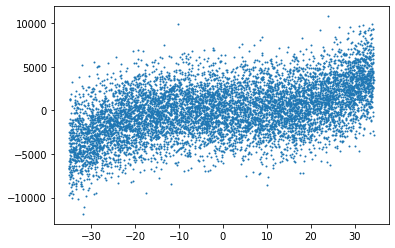

In [146]:
plt.scatter(my_data[:,0], my_data[:,1], s=1)

#### Task 2.2.2 - Calculating Bias and Variance

In [152]:
def regression(x, y, degree):
    '''
    Computes prediction of y given x and degree

    Args:
        x: input data
        y: output data
        degree: degree of polynomial

    Returns:
        y_predicted: predicted output
    '''
    # PolynomialFeatures part
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    train_sets_X_poly = []
    for row in x:
        row = row.reshape(-1,1)
        new_row = poly.fit_transform(row)
        train_sets_X_poly.append(new_row)
    train_sets_X_poly = np.array(train_sets_X_poly)

    # LinearRegression part
    reg = LinearRegression()
    y_predicted = []
    for i in range(len(train_sets_X_poly)):
        reg.fit(train_sets_X_poly[i], y[i])
        y_predicted.append(reg.predict(train_sets_X_poly[i]))
        
    return y_predicted

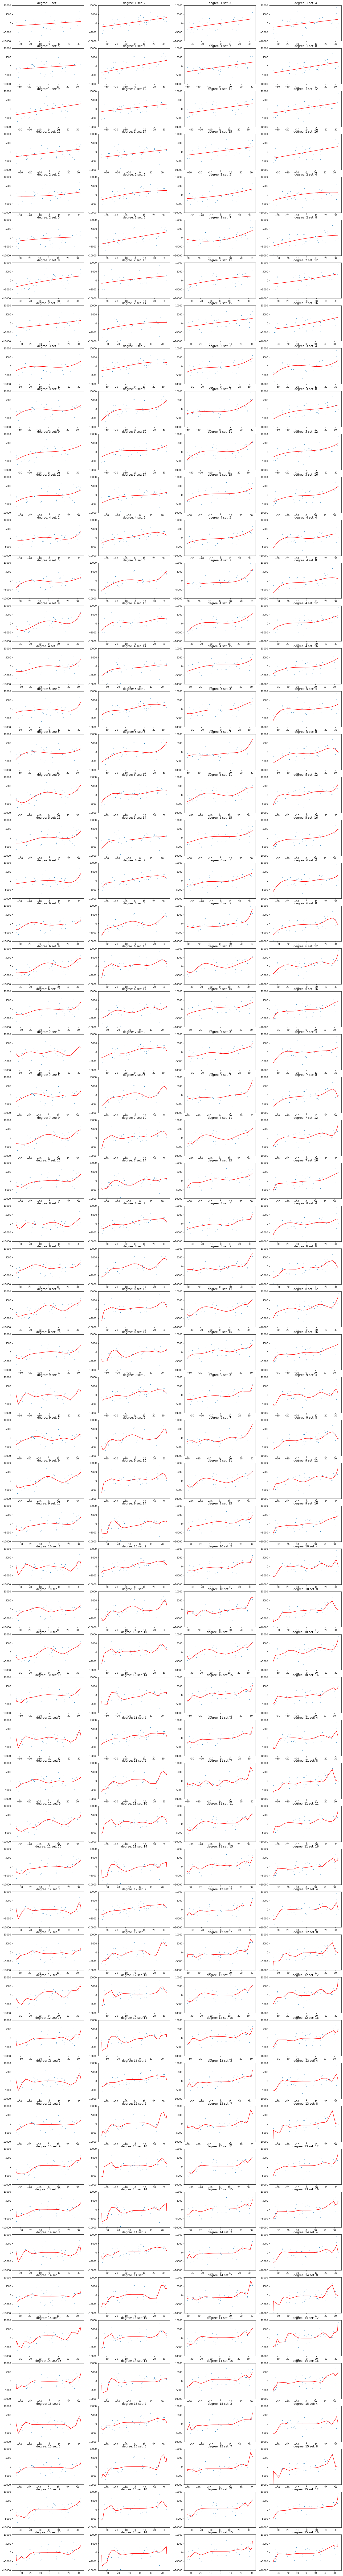

In [168]:
poly_y = []
for i in range(1, 16):
    poly_y.append(regression(train_sets_X, train_sets_Y, i))

plt.figure(figsize=(25,200))
for i in range(15):
    for j in range(16):
        plt.subplot(60,4,16*i + j+1)
        plt.scatter(train_sets_X[j], train_sets_Y[j], s=1)
        plt.ylim(-10000, 10000)
        plt.plot(train_sets_X[j], poly_y[i][j], color='red')
        plt.title('degree: ' + str(i+1) + ' set: ' + str(j+1))